**X-Ray classification**

**Exploratory data analysis**

Given a study containing X-Ray images, build a deep learning model that decides if the study is normal or abnormal. 

You must use at least **2 different architectures**,
* one with your own CNN model (e.g., you can use a model similar to the CNN of the previous project) and 
* one with a popular CNN pre-trained CNN model (e.g., VGG-19, ResNet, etc.). 

Use the MURA dataset to train and evaluate your models. More information about the task and the dataset can be found [here](https://stanfordmlgroup.github.io/competitions/mura/). To download the dataset you must fill out a form, so complete this action as soon as possible.

In [1]:
from lib import data_loader
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img

In [2]:
directory = 'data/'

In [3]:
train, test, bodyparts, bodyparts_train_validation_dict, train_generators, valid_generators, test_generators = data_loader.data_loader()


Import train and test data


Create dictionary for training and validation set per body part

No data augmentation

Create dictionary for training, validation and test set per body part

Found 8772 validated image filenames.
Found 980 validated image filenames.
Found 659 validated image filenames.
Found 7531 validated image filenames.
Found 848 validated image filenames.
Found 563 validated image filenames.
Found 4993 validated image filenames.
Found 550 validated image filenames.
Found 460 validated image filenames.
Found 4577 validated image filenames.
Found 529 validated image filenames.
Found 461 validated image filenames.
Found 4429 validated image filenames.
Found 502 validated image filenames.
Found 465 validated image filenames.
Found 1146 validated image filenames.
Found 126 validated image filenames.
Found 288 validated image filenames.
Found 1646 validated image filenames.
Found 179 validated image filenames.
Found 301 validated image filenames.
Data munging completed


# EDA
## Check balance of the dataset

In [4]:
def plot_hist_region(df):
  fig  = plt.figure(figsize=(8,4), dpi = 150)
  df['bodypart'].hist(bins = 13, color = 'red')
  plt.xticks(rotation = 90)

In [5]:
plot_hist_region(train)

In [6]:
plot_hist_region(test)

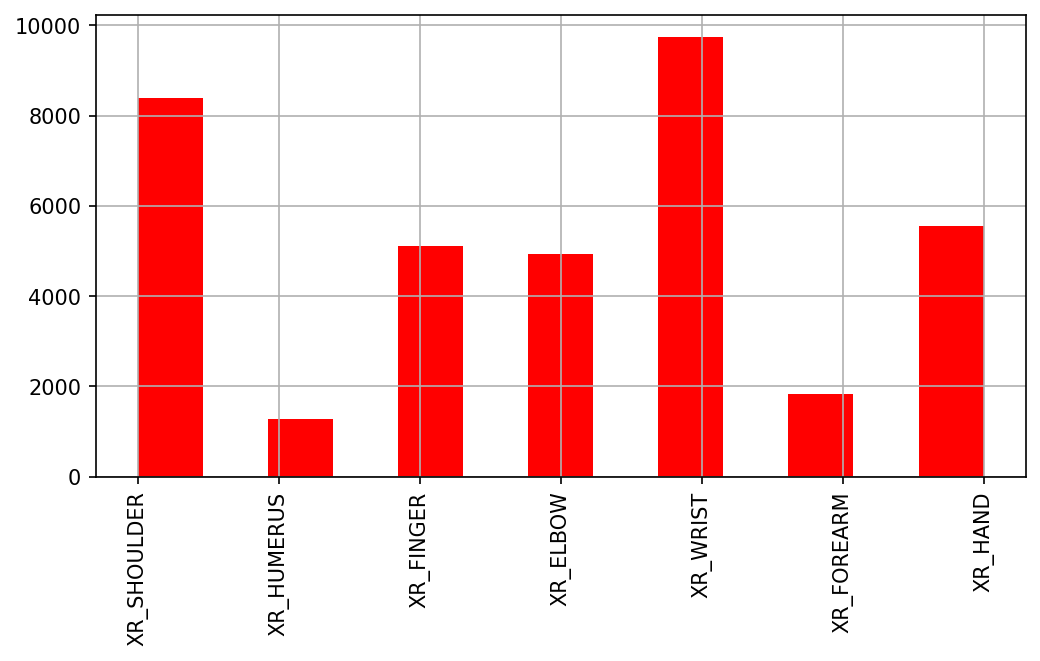

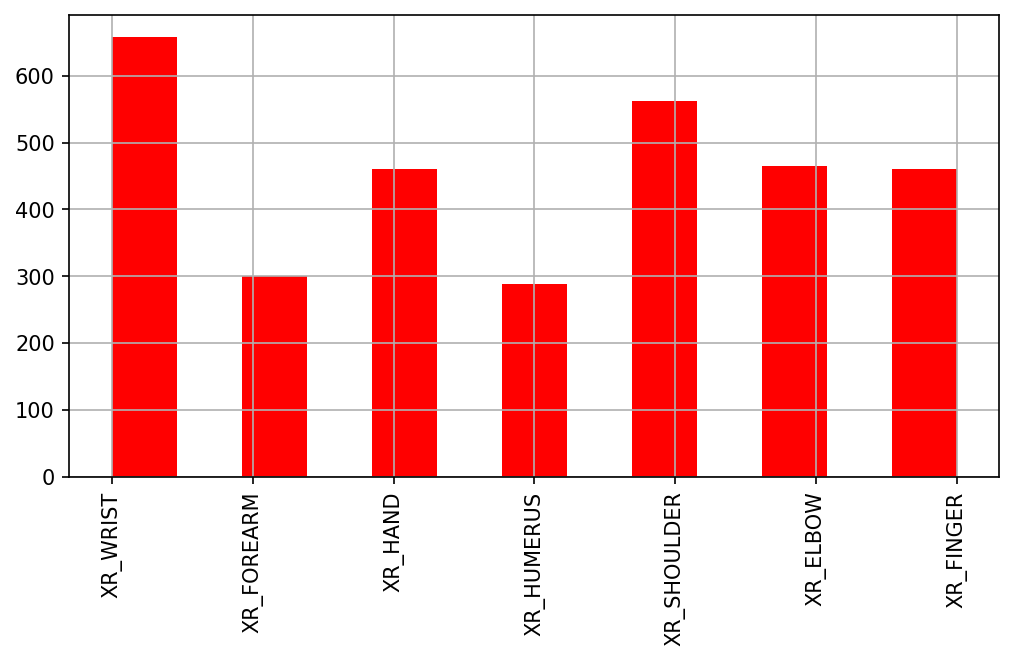

<Figure size 1200x600 with 0 Axes>

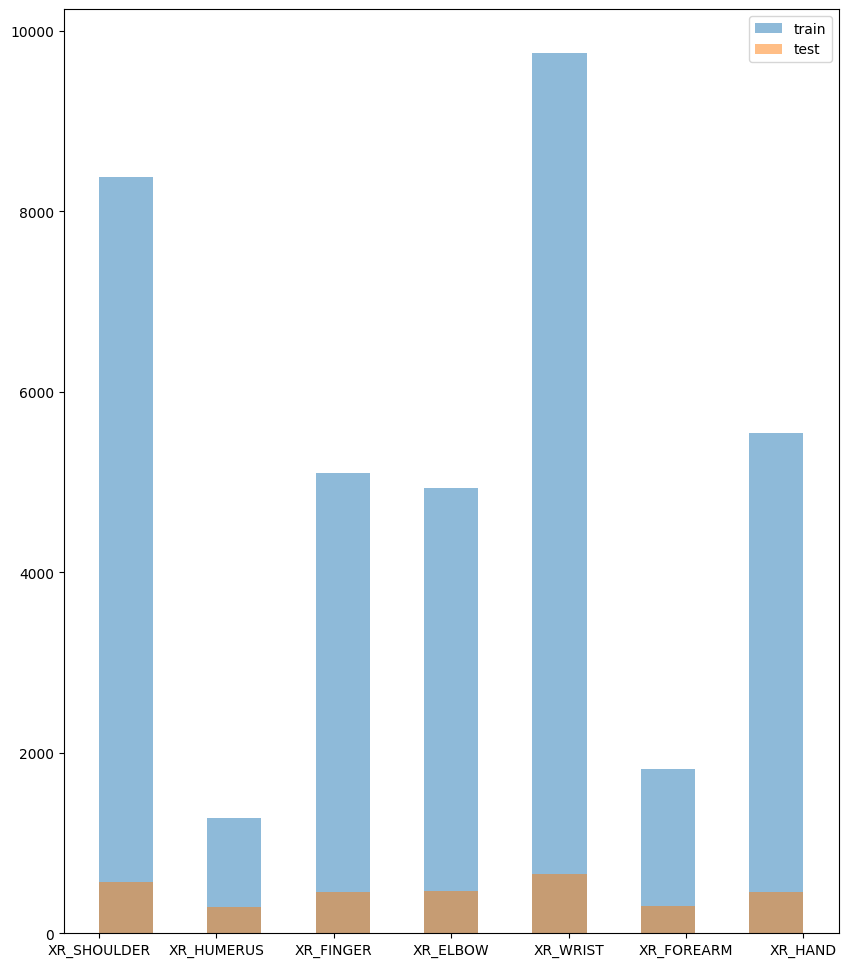

In [7]:
fig  = plt.figure(figsize=(8,4), dpi = 150)
plt.figure(figsize=(10,12))
plt.hist(train['bodypart'], alpha=0.5, bins = 13, label='train')
plt.hist(test['bodypart'], alpha=0.5, bins = 13, label='test')
plt.legend()
plt.show()

In [8]:
def class_counts(df):
  patients_per_bodypart = df.groupby('bodypart')['patient'].count().reset_index()
  patients_per_bodypart.rename(columns={'patient':'patient_count'},inplace=True)
  abnormalities_per_bodypart = df.groupby('bodypart')['class'].sum().reset_index()
  abnormalities_per_bodypart.rename(columns={'class':'abnorm_count'},inplace=True)
  total = patients_per_bodypart.merge(abnormalities_per_bodypart)
  total['normal_count'] = total['patient_count'] - total['abnorm_count']
  total['abnorm_percentage'] = (total['abnorm_count']/total['patient_count'])
  total['normal_percentage'] = (total['normal_count']/total['patient_count'])
  return total

In [9]:
def barplot_per_bodypart(df, name, width): 
  xtick_labels = df['bodypart']
  xtick_position = np.arange(len(xtick_labels))
  fig, ax = plt.subplots(figsize=(10,6), constrained_layout=True)
  abnorm_bars = ax.bar(xtick_position - width/2, 
                       df['abnorm_count'], 
                       width=width,  
                       label='Abnormal')
  normal_bars = ax.bar(xtick_position + width/2,
                       df['normal_count'], 
                       width=width, 
                       label='Normal')

  for rect in abnorm_bars + normal_bars:
      height = rect.get_height()
      plt.text(rect.get_x() + rect.get_width() / 2.0, 
               height, 
               f'{height:.0f}', 
               ha='center', 
               va='bottom')

  ax.set_title('%s Set'% name)
  ax.set_ylabel('Count')
  ax.set_xticks(xtick_position)
  ax.set_xticklabels(xtick_labels)
  ax.legend()

  fig.suptitle('Count of Abnormal and Normal Results per Bodypart (%s) set' % name)
  plt.show()

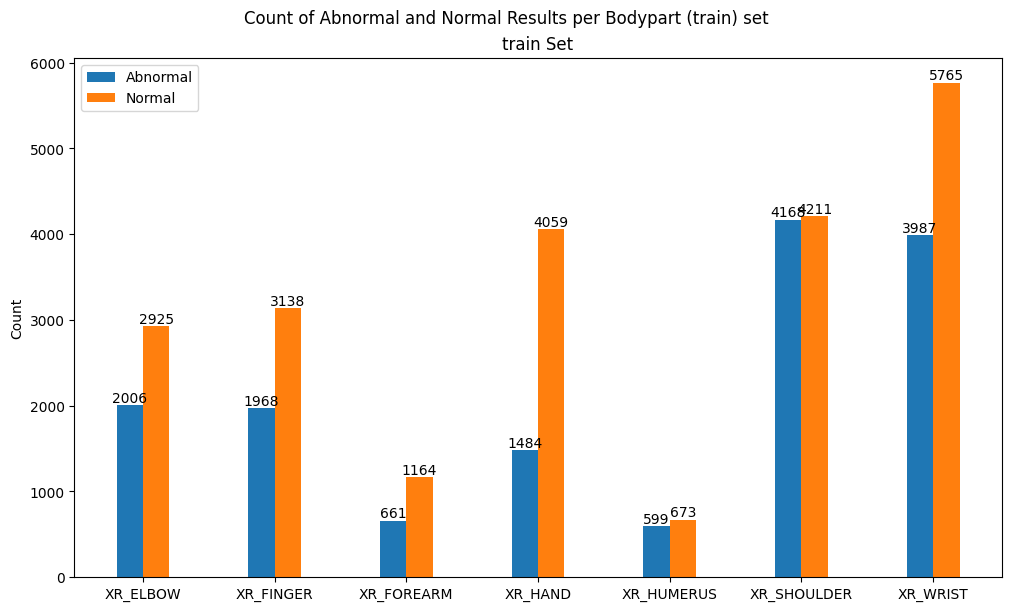

In [10]:
stats_train = class_counts(train)
stats_test = class_counts(test)
barplot_per_bodypart(stats_train, "train", 0.2)

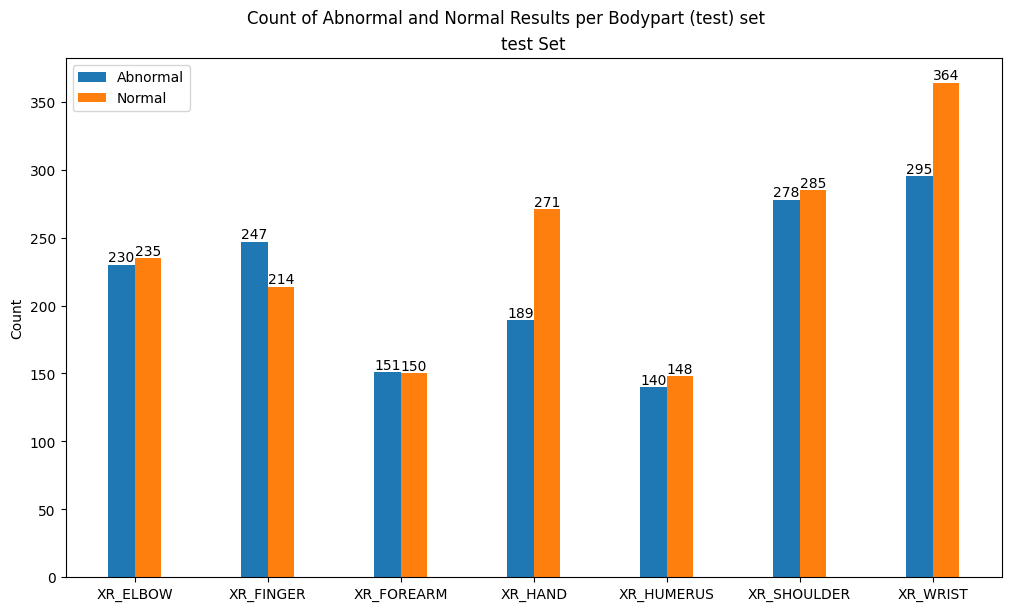

In [11]:
barplot_per_bodypart(stats_test, "test", 0.2)

In [12]:
def balance_calculator(name, df):
    train, valid = df
    print('Training set')
    negative = round(sum(train['class']== 0) / len(train), 2) * 100
    positive = round(sum(train['class']== 1) / len(train), 2) * 100
    print(f"{name}: {negative} % of normal X-rays.")
    print(f"{name}: {positive} % of abnormal X-rays.")
    print('Validation set')
    negative = round(sum(valid['class']== 0) / len(valid), 2) * 100
    positive = round(sum(valid['class']== 1) / len(valid), 2) * 100
    print(f"{name}: {negative} % of normal X-rays.")
    print(f"{name}: {positive} % of abnormal X-rays.")
    print('\n')
    pass 

In [13]:
for bodypart, datasets in bodyparts_train_validation_dict.items():
    balance_calculator(bodypart, datasets)

Training set
XR_WRIST: 59.0 % of normal X-rays.
XR_WRIST: 41.0 % of abnormal X-rays.
Validation set
XR_WRIST: 62.0 % of normal X-rays.
XR_WRIST: 38.0 % of abnormal X-rays.


Training set
XR_SHOULDER: 50.0 % of normal X-rays.
XR_SHOULDER: 50.0 % of abnormal X-rays.
Validation set
XR_SHOULDER: 48.0 % of normal X-rays.
XR_SHOULDER: 52.0 % of abnormal X-rays.


Training set
XR_HAND: 73.0 % of normal X-rays.
XR_HAND: 27.0 % of abnormal X-rays.
Validation set
XR_HAND: 72.0 % of normal X-rays.
XR_HAND: 28.000000000000004 % of abnormal X-rays.


Training set
XR_FINGER: 61.0 % of normal X-rays.
XR_FINGER: 39.0 % of abnormal X-rays.
Validation set
XR_FINGER: 62.0 % of normal X-rays.
XR_FINGER: 38.0 % of abnormal X-rays.


Training set
XR_ELBOW: 59.0 % of normal X-rays.
XR_ELBOW: 41.0 % of abnormal X-rays.
Validation set
XR_ELBOW: 61.0 % of normal X-rays.
XR_ELBOW: 39.0 % of abnormal X-rays.


Training set
XR_HUMERUS: 54.0 % of normal X-rays.
XR_HUMERUS: 46.0 % of abnormal X-rays.
Validation set


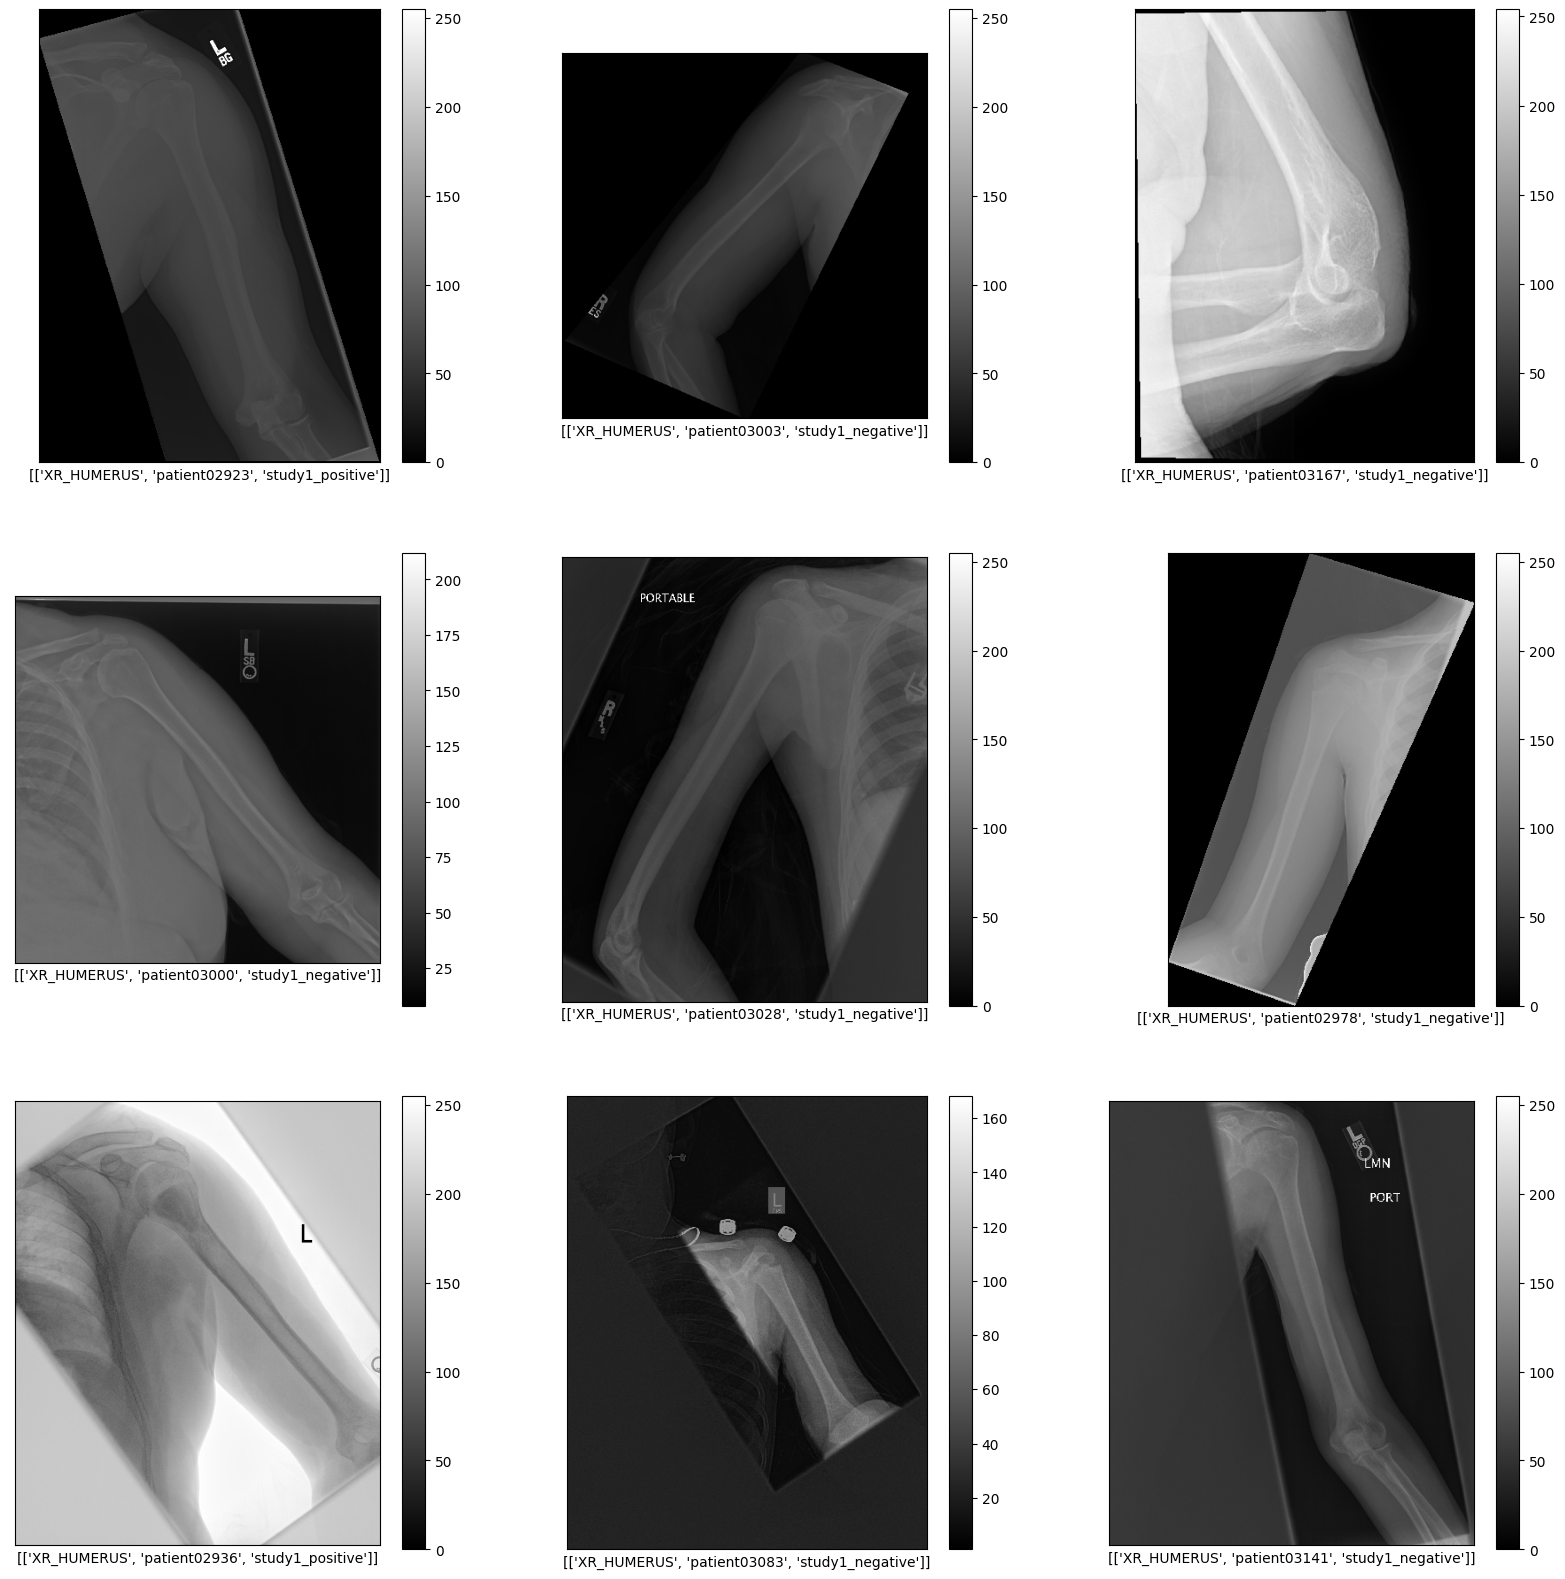

In [14]:
x_train_HUMERUS = bodyparts_train_validation_dict['XR_HUMERUS'][0]['img_path']
y_train_HUMERUS = bodyparts_train_validation_dict['XR_HUMERUS'][0]['img_path']

plt.figure(figsize=(20,20))
for i in range(9):
    n = np.random.randint(1,len(x_train_HUMERUS))
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(load_img(directory+x_train_HUMERUS[n]), 
               cmap='gray')
    plt.colorbar()
    plt.xlabel([y_train_HUMERUS[n].split('/')[2:5]])
plt.show()